In [1]:
#Prerequisites
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from scipy.stats import multivariate_normal

def GetHypo0():
    mean = (1, 1)
    cov = [[2, 0.8], [0.8, 1.0]]
    return mean, cov

def GetHypo1():
    mean = (0, -1)
    cov = [[2, 1.0], [1.0, 1.5]]
    return mean, cov

def GetRandomData(nSamp):
    #Create dummy data set 1
    mean, cov = GetHypo0()
    dat1 = np.random.multivariate_normal(mean, cov, nSamp)
    
    #Create dummy data set 2
    mean, cov = GetHypo1()
    dat2 = np.random.multivariate_normal(mean, cov, nSamp)

    return dat1, dat2

def GetHypoPDF(mean, cov):
    x, y = np.mgrid[-6:6:.01, -6:6:.01]
    pos = np.empty(x.shape + (2,))
    pos[:, :, 0] = x; pos[:, :, 1] = y
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(pos)
    print(z.shape)
    return z

def EvaluatePDF1(Data):
    mean, cov = GetHypo1()
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(Data)
    print(z.shape)
    return z

def EvaluatePDF0(Data):
    mean, cov = GetHypo0()
    rv = multivariate_normal(mean, cov)
    z = rv.pdf(Data)
    print(z.shape)
    return z

def PlotRandomData(dat1, dat2):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(dat1[:,0], dat1[:,1], s=10, c='b', marker="s", label='Hypothesis 0', alpha=0.01)
    ax1.scatter(dat2[:,0], dat2[:,1], s=10, c='r', marker="o", label='Hypothesis 1', alpha=0.015)
    plt.legend(loc='upper left');
    plt.show()  

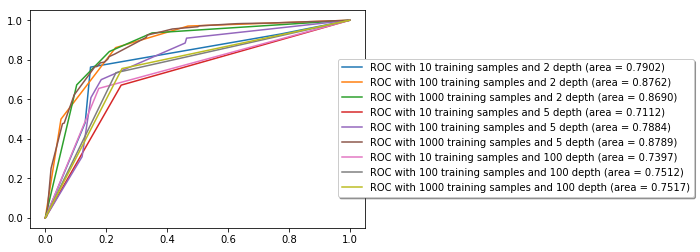

In [6]:
#Now try with Decision Trees
from sklearn.tree import DecisionTreeClassifier
depths = [2, 5, 100]
D0test, D1test = GetRandomData(200000)
tstones = np.ones(max(D0test.shape)) 
tstzeros = np.zeros(max(D1test.shape)) 

for depth in depths:
    nSamp = [10, 100, 1000]
    for samp in nSamp:
        D0train, D1train = GetRandomData(samp)
        onearry = np.ones(max(D0train.shape))
        zeroarry = np.zeros(max(D1train.shape))
        clf = DecisionTreeClassifier(max_depth=depth)
        clf.fit(np.concatenate((D1train, D0train)), np.concatenate((zeroarry, onearry)))
        outlabel = clf.predict(np.concatenate((D1test, D0test)))
        outprobs = clf.predict_proba(np.concatenate((D1test, D0test)))
        #print(outprobs)
        fpr, tpr, _ = roc_curve(np.concatenate((tstzeros, tstones)), outprobs[:,1])
        roc_auc= auc(fpr, tpr)

        plt.plot(fpr, tpr, label='ROC with '+ str(samp) + ' training samples and ' + str(depth) + ' depth (area = %0.4f)' % roc_auc)

plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8), shadow=True, ncol=1)
plt.show()

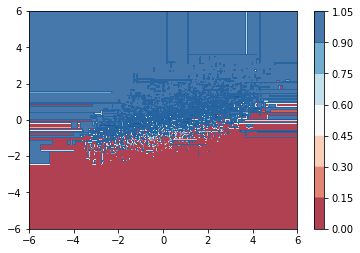

In [5]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
D0test, D1test = GetRandomData(200000)
tstones = np.ones(max(D0test.shape)) 
tstzeros = np.zeros(max(D1test.shape)) 

D0train, D1train = GetRandomData(100000)
onearry = np.ones(max(D0train.shape))
zeroarry = np.zeros(max(D1train.shape))
clf = DecisionTreeClassifier()
clf.fit(np.concatenate((D1train, D0train)), np.concatenate((zeroarry, onearry)))
outlabel = clf.predict(np.concatenate((D1test, D0test)))
#outprobs = clf.predict_proba(np.concatenate((D1test, D0test)))
#print(outprobs)
#fpr, tpr, _ = roc_curve(np.concatenate((tstzeros, tstones)), outprobs[:,1])
#roc_auc= auc(fpr, tpr)

x_min, x_max = -6, 6
y_min, y_max = -6, 6
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

if hasattr(clf, "decision_function"):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
elif hasattr(clf, "predict_proba"):
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig, ax1 = plt.subplots(nrows=1)
cntr = plt.contourf(xx, yy, (Z), cmap=cm, alpha=.8)
fig.colorbar(cntr, ax=ax1)
# Plot also the training points
plt.scatter(np.concatenate((D1train, D0train))[:, 0], np.concatenate((D1train, D0train))[:, 1], c=np.concatenate((zeroarry, onearry)), cmap=cm_bright,
           edgecolors='black', s=25, alpha=0.001)
# and testing points
#plt.scatter(np.concatenate((D1test, D0test))[:, 0], np.concatenate((D1test, D0test))[:, 1], c=np.concatenate((tstzeros, tstones)), cmap=cm_bright,
#           alpha=0.01, edgecolors='black', s=25)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.xticks(())
#plt.yticks(())
plt.show()
